# Avaliação 01
___
## Modelo de RNA com dados de potência elétrica

Requisitos:
* Erro Percentual Absoluto Máximo menor que 10%
* Erro Percentual Absoluto Médio menor que 5%

**Disciplina:** Automação Inteligênte

**Autor:** Miguel Marques Ferreira

**GitHub:** https://github.com/Miguel-mmf

## Bibliotecas

In [4]:
!pip install seaborn tqdm

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('default')

import seaborn as sns
from tqdm import tqdm

%matplotlib inline

## Leitura dos dados

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/Miguel-mmf/smart-automation/main/data/dados_demanda.csv?token=GHSAT0AAAAAACK2YQPW6KCJDO5FPMWMDR6CZO3IHXQ', sep=';', decimal=',')
data['TEMPO'] = data[['DIA','MES','ANO','HORA','MINUTO']].apply(
    lambda x : datetime(
        year=x[2],
        month=x[1],
        day=x[0],
        hour=x[3],
        minute=x[4]
    ),
    axis=1
)
data.drop(columns=['Unnamed: 6','DIA','MES','ANO','HORA','MINUTO'], inplace=True, errors='ignore')
data.rename(columns={'JPS_12B1':'POTENCIA'},inplace=True)
# data.set_index('TEMPO', inplace=True)
data.head()

/tmp/ipykernel_589/2578963852.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year=x[2],
/tmp/ipykernel_589/2578963852.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  month=x[1],
/tmp/ipykernel_589/2578963852.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day=x[0],
/tmp/ipykernel_589/2578963852.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

POTENCIA               TEMPO
0       7.9 2008-01-01 00:00:00
1       7.7 2008-01-01 00:15:00
2       7.7 2008-01-01 00:30:00
3       7.4 2008-01-01 00:45:00
4       7.4 2008-01-01 01:00:00

In [8]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   POTENCIA  210432 non-null  float64       
 1   TEMPO     210432 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 MB


## Cálculo da Energia (E)

In [9]:
data['ENERGIA'] = None
pbar = tqdm(total=len(data['TEMPO'].dt.strftime('%Y-%m-%d').unique()), leave=False)
for d in data['TEMPO'].dt.strftime('%Y-%m-%d').unique():
    aux = data[data['TEMPO'].dt.strftime('%Y-%m-%d') == d].copy()
    start_i = aux.index[0]
    end_i = aux.index[-1]
    aux['POTENCIA'] = aux['POTENCIA']*0.25
    data.loc[start_i:end_i, 'ENERGIA'] = aux['POTENCIA'].cumsum()
    
    pbar.update()

  0%|          | 0/2192 [00:00<?, ?it/s]

100%|█████████▉| 2191/2192 [02:10<00:00, 16.51it/s]

In [10]:
data.head(3)

POTENCIA               TEMPO ENERGIA
0       7.9 2008-01-01 00:00:00   1.975
1       7.7 2008-01-01 00:15:00     3.9
2       7.7 2008-01-01 00:30:00   5.825

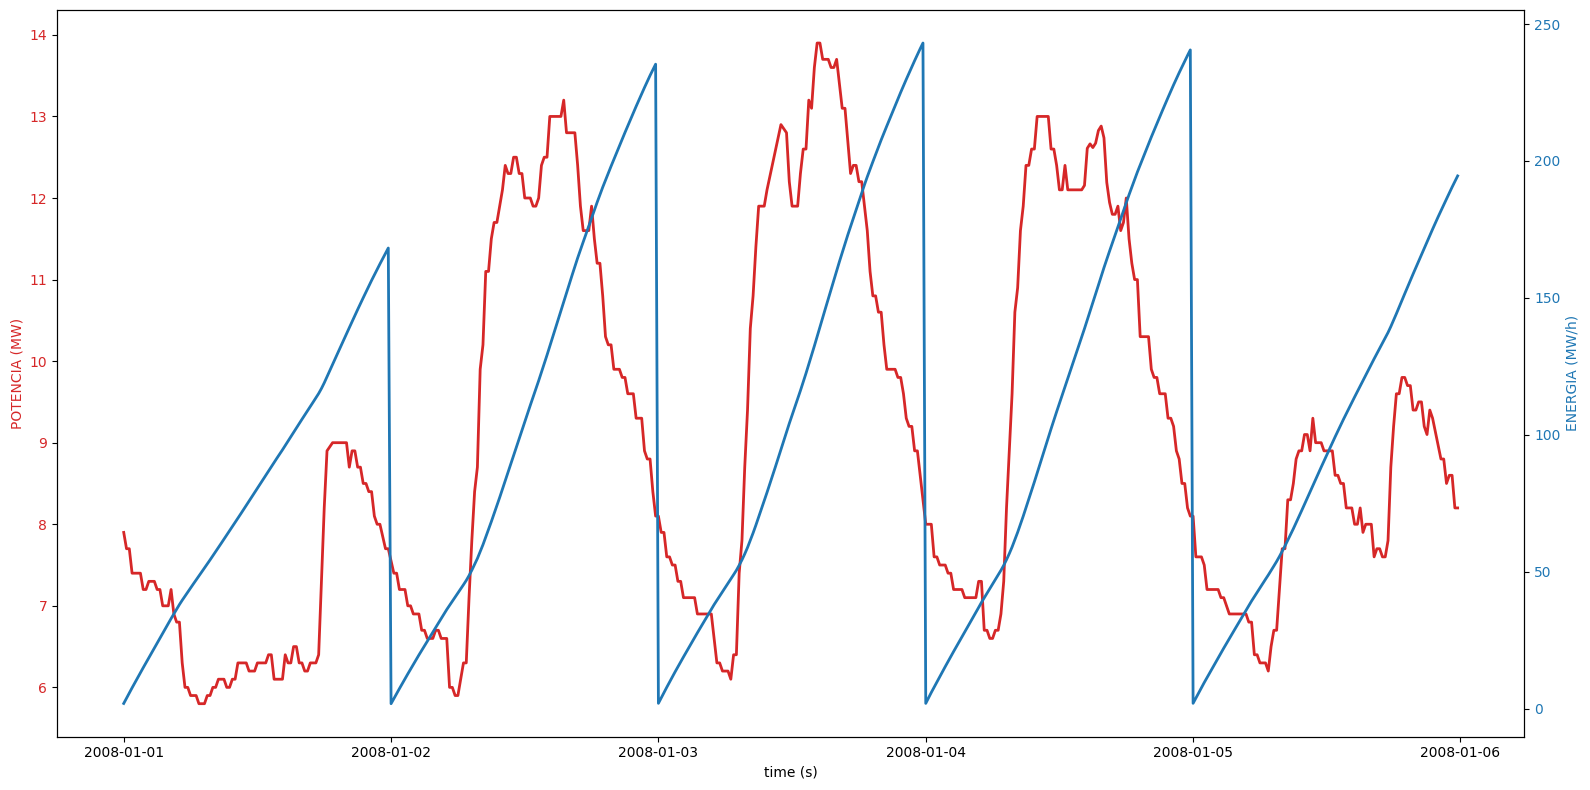

In [11]:
data2plot = data[data['TEMPO'].dt.strftime('%Y-%m-%d') <= '2008-01-05'][['POTENCIA','ENERGIA','TEMPO']] #.plot()

fig, ax1 = plt.subplots(figsize=(16,8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('POTENCIA (MW)', color=color)
ax1.plot(data2plot.TEMPO, data2plot['POTENCIA'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ENERGIA (MW/h)', color=color)  # we already handled the x-label with ax1
ax2.plot(data2plot.TEMPO, data2plot['ENERGIA'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Cálculo da Taxa de Crescimento de Energia (ΔE)

In [12]:
data['TAXA_ENERGIA'] = data['ENERGIA'].diff()
data['TAXA_ENERGIA'].fillna(0, inplace=True)

/tmp/ipykernel_589/932401917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TAXA_ENERGIA'].fillna(0, inplace=True)
/tmp/ipykernel_589/932401917.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['TAXA_ENERGIA'].fillna(0, inplace=True)


<Axes: >

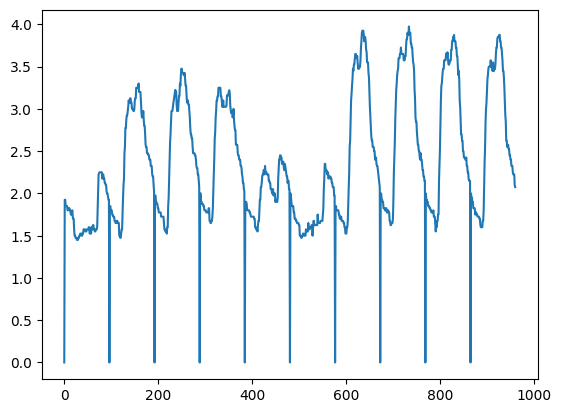

100%|██████████| 2192/2192 [02:30<00:00, 16.51it/s]

In [13]:
data['TAXA_ENERGIA'].mask(data['TAXA_ENERGIA']<0,0, inplace=True)
data[data['TEMPO'].dt.strftime('%Y-%m-%d') <= '2008-01-10']['TAXA_ENERGIA'].plot()

## Máximo Semanal

In [14]:
data.set_index('TEMPO', inplace=True)

In [15]:
max_semanal = data.resample('W').max() #agg(['max'])
# max_diaria = data.resample('D').agg(['max'])

Text(0.5, 0, 'Tempo')

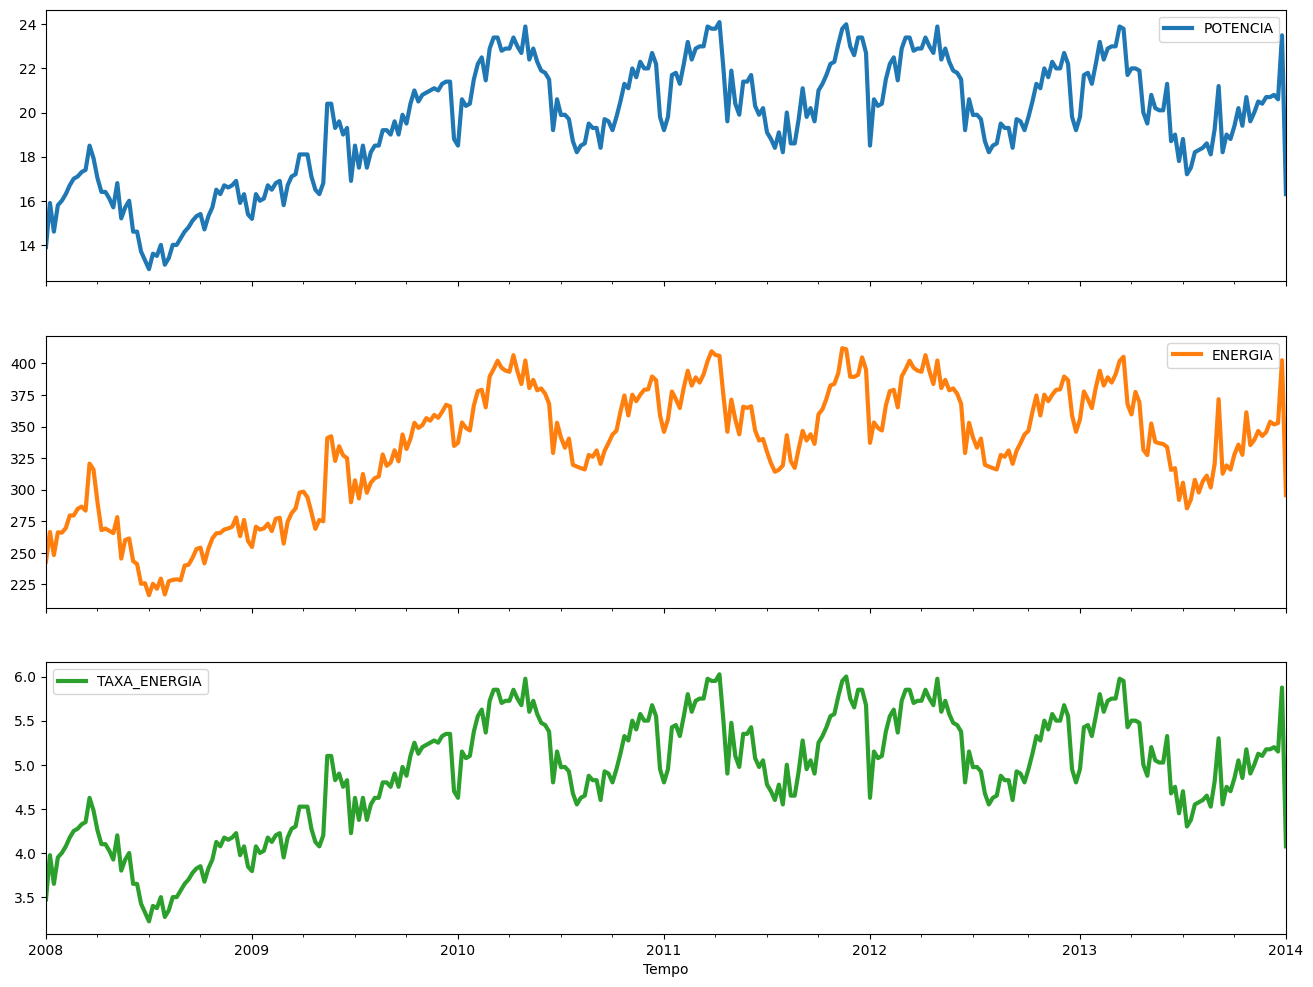

In [16]:
max_semanal.plot(subplots=True, figsize=(16,12), sharex=True, linewidth=3)
plt.xlabel('Tempo')
# plt.ylabel('Potência Máxima')
# plt.title('Potência Máxima Semanal')

## Criando o banco de dados para treinamento e teste da RNA

In [17]:
data_semanal = max_semanal.copy()
data_semanal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2008-01-06 to 2014-01-05
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   POTENCIA      314 non-null    float64
 1   ENERGIA       314 non-null    object 
 2   TAXA_ENERGIA  314 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.8+ KB


In [18]:
data_semanal.reset_index(inplace=True)

n_anteriores = 4 # 4 amostras anteriores, o que corresponde a 1 hora de dados
n_posteriores = 2 # 1 amostra posterior, o que corresponde a valores 30 minutos no futuro

for i in range(1,n_anteriores+1):
    data_semanal[f'POTENCIA(K-{i})'] = data_semanal['POTENCIA'].shift(i)
    data_semanal[f'ENERGIA(K-{i})'] = data_semanal['ENERGIA'].shift(i)
    data_semanal[f'TAXA_ENERGIA(K-{i})'] = data_semanal['TAXA_ENERGIA'].shift(i)
    
for i in range(-1,-(n_posteriores+1),-1):
    data_semanal[f'POTENCIA(K+{-i})'] = data_semanal['POTENCIA'].shift(i)

data_semanal.columns

Index(['TEMPO', 'POTENCIA', 'ENERGIA', 'TAXA_ENERGIA', 'POTENCIA(K-1)',
       'ENERGIA(K-1)', 'TAXA_ENERGIA(K-1)', 'POTENCIA(K-2)', 'ENERGIA(K-2)',
       'TAXA_ENERGIA(K-2)', 'POTENCIA(K-3)', 'ENERGIA(K-3)',
       'TAXA_ENERGIA(K-3)', 'POTENCIA(K-4)', 'ENERGIA(K-4)',
       'TAXA_ENERGIA(K-4)', 'POTENCIA(K+1)', 'POTENCIA(K+2)'],
      dtype='object')

In [19]:
# data_semanal['week_number'] = data_semanal.TEMPO.map(lambda x: x.isocalendar().week)
# data_semanal['mean_last_four_weeks'] = data_semanal[['POTENCIA(K-4)', 'POTENCIA(K-3)', 'POTENCIA(K-2)', 'POTENCIA(K-1)']].mean(axis=1)
# data_semanal['mean_last_two_weeks'] = data_semanal[['POTENCIA(K-2)', 'POTENCIA(K-1)']].mean(axis=1)
data_semanal.dropna(inplace=True)
# data_semanal.drop(columns=['index','TEMPO'],inplace=True, errors='ignore')
data_semanal.head()

TEMPO   POTENCIA  ENERGIA  TAXA_ENERGIA  POTENCIA(K-1) ENERGIA(K-1)  \
4 2008-02-03  16.000000   265.95         4.000      15.800000     266.2225   
5 2008-02-10  16.299999  269.575         4.075      16.000000       265.95   
6 2008-02-17  16.700001  279.575         4.175      16.299999      269.575   
7 2008-02-24  17.000000   279.55         4.250      16.700001      279.575   
8 2008-03-02  17.100000  284.825         4.275      17.000000       279.55   

   TAXA_ENERGIA(K-1)  POTENCIA(K-2) ENERGIA(K-2)  TAXA_ENERGIA(K-2)  \
4              3.950      14.600000     248.2375              3.650   
5              4.000      15.800000     266.2225              3.950   
6              4.075      16.000000       265.95              4.000   
7              4.175      16.299999      269.575              4.075   
8              4.250      16.700001      279.575              4.175   

   POTENCIA(K-3) ENERGIA(K-3)  TAXA_ENERGIA(K-3)  POTENCIA(K-4) ENERGIA(K-4)  \
4      15.900000   266.475001              3.975           13.9   243.062499   
5      14.600000     248.2375              3.650           15.9   266.475001   
6      15.800000     266.2225              3.950           14.6     248.2375   
7      16.000000       265.95              4.000           15.8     266.2225   
8      16.299999      269.575              4.075           16.0       265.95   

   TAXA_ENERGIA(K-4)  POTENCIA(K+1)  POTENCIA(K+2)  
4              3.475      16.299999      16.700001  
5              3.975      16.700001      17.000000  
6              3.650      17.000000      17.100000  
7              3.950      17.100000      17.299999  
8              4.000      17.299999      17.400000

In [20]:
data_semanal.columns

Index(['TEMPO', 'POTENCIA', 'ENERGIA', 'TAXA_ENERGIA', 'POTENCIA(K-1)',
       'ENERGIA(K-1)', 'TAXA_ENERGIA(K-1)', 'POTENCIA(K-2)', 'ENERGIA(K-2)',
       'TAXA_ENERGIA(K-2)', 'POTENCIA(K-3)', 'ENERGIA(K-3)',
       'TAXA_ENERGIA(K-3)', 'POTENCIA(K-4)', 'ENERGIA(K-4)',
       'TAXA_ENERGIA(K-4)', 'POTENCIA(K+1)', 'POTENCIA(K+2)'],
      dtype='object')

## Salvando os dados

In [21]:
data_semanal.to_csv('data_semanal.csv', index=False)
data_semanal.to_parquet('data_semanal.parquet', index=False)

## Correlação dos dados de entrada com os dados de saída

In [24]:
corr_k1 = np.abs(data_semanal.corr().filter(items=['POTENCIA(K+1)']).dropna()).T.drop(columns=['POTENCIA(K+1)','POTENCIA(K+2)']).sort_values(axis=1,by='POTENCIA(K+1)',ascending=False)
corr_k2 = np.abs(data_semanal.corr().filter(items=['POTENCIA(K+2)']).dropna()).T.drop(columns=['POTENCIA(K+2)','POTENCIA(K+1)']).sort_values(axis=1,by='POTENCIA(K+2)',ascending=False)
corr_k1.loc[:,corr_k1.columns]

ENERGIA  TAXA_ENERGIA  POTENCIA  ENERGIA(K-1)  \
POTENCIA(K+1)  0.936873      0.936195  0.936195      0.908042   

               TAXA_ENERGIA(K-1)  POTENCIA(K-1)  ENERGIA(K-2)  POTENCIA(K-2)  \
POTENCIA(K+1)           0.903429       0.903429      0.887456       0.873995   

               TAXA_ENERGIA(K-2)  ENERGIA(K-3)  TAXA_ENERGIA(K-3)  \
POTENCIA(K+1)           0.873995      0.863717           0.846929   

               POTENCIA(K-3)  ENERGIA(K-4)  POTENCIA(K-4)  TAXA_ENERGIA(K-4)  \
POTENCIA(K+1)       0.846929      0.836535       0.812574           0.812574   

                  TEMPO  
POTENCIA(K+1)  0.564651

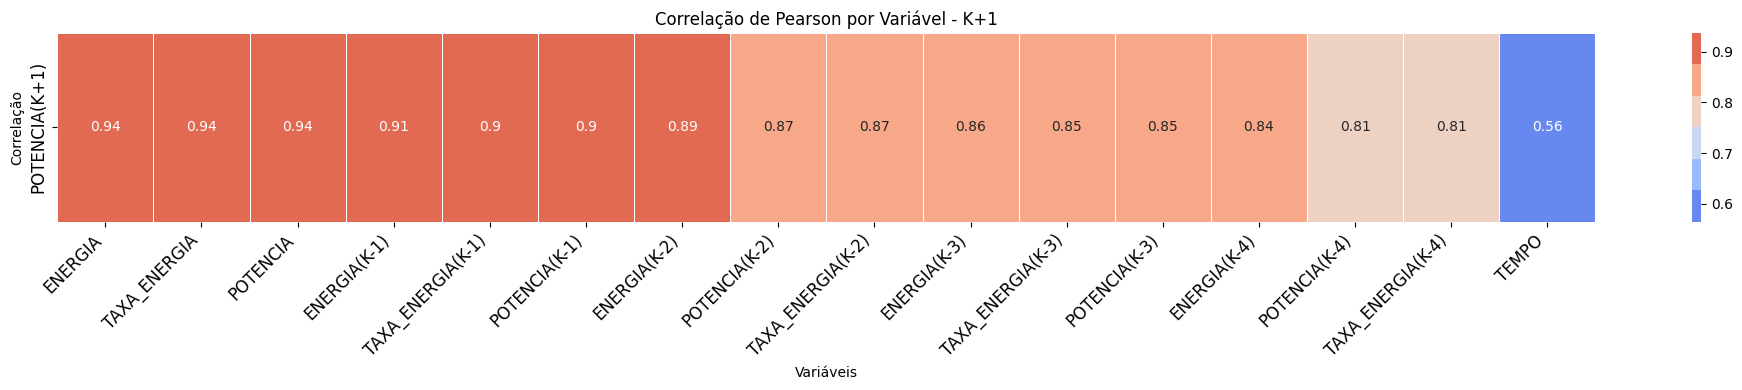

In [27]:
f, ax = plt.subplots(figsize=(20,4))

my_plot = sns.heatmap(
    corr_k1,
    # pd.DataFrame(corr_k1['POTENCIA(K+1)'].filter(items=corr_k1.columns)).T,
    cmap=sns.color_palette("coolwarm"),
    linewidths=0.5,
    annot=True
)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

#modify individual font size of elements
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.title('Correlação de Pearson por Variável - K+1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig(
    'correlacao_k1.pdf',
    format='pdf',
    dpi=300
)

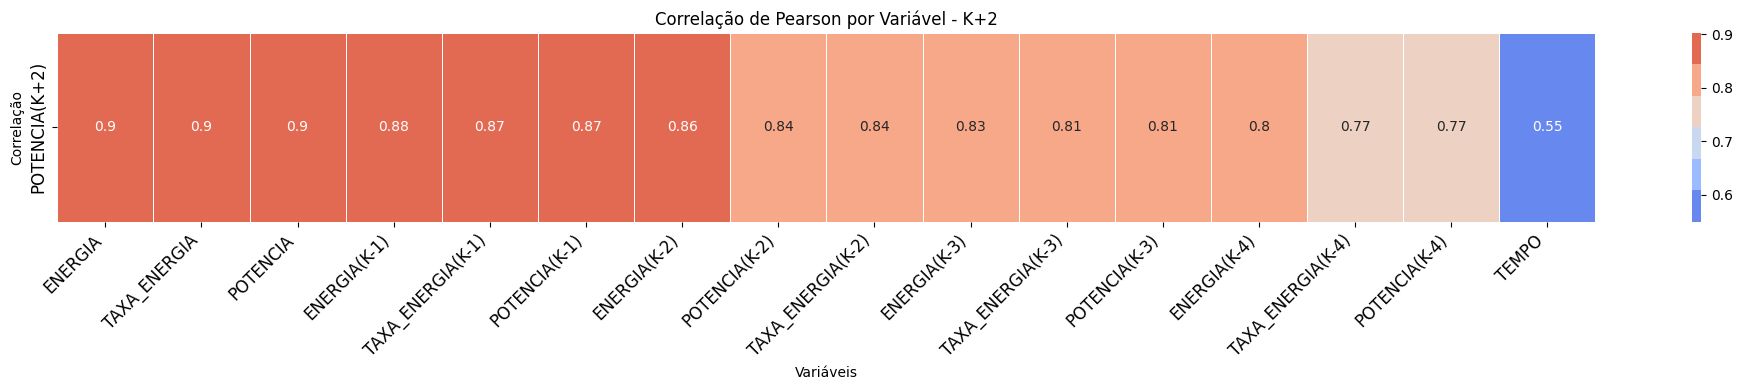

In [28]:
f, ax = plt.subplots(figsize=(20,4))

my_plot = sns.heatmap(
    corr_k2,
    # pd.DataFrame(corr_k1['POTENCIA(K+1)'].filter(items=corr_k1.columns)).T,
    cmap=sns.color_palette("coolwarm"),
    linewidths=0.5,
    annot=True
)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

#modify individual font size of elements
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.title('Correlação de Pearson por Variável - K+2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig(
    'correlacao_k2.pdf',
    format='pdf',
    dpi=300
)

## Feature Importance

In [31]:
from sklearn.ensemble import RandomForestRegressor

aux = data_semanal.copy()
aux['week_number'] = aux['TEMPO'].map(lambda x: x.isocalendar().week)
aux['mean_last_four_weeks'] = aux[['POTENCIA(K-4)', 'POTENCIA(K-3)', 'POTENCIA(K-2)', 'POTENCIA(K-1)']].mean(axis=1)
aux['mean_last_two_weeks'] = aux[['POTENCIA(K-2)', 'POTENCIA(K-1)']].mean(axis=1)

aux.drop(columns=['TEMPO'], inplace=True)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(
    aux.drop(columns=['POTENCIA(K+1)', 'POTENCIA(K+2)']),
    aux.filter(items=['POTENCIA(K+1)', 'POTENCIA(K+2)'])
)

# for i, j in zip(aux.drop(columns=['POTENCIA(K+1)', 'POTENCIA(K+2)']).columns, rf.feature_importances_):
#     print(f"{i}: {j}")

RandomForestRegressor(random_state=42)

In [33]:
feature_importances = pd.DataFrame(
    index=aux.drop(columns=['POTENCIA(K+1)', 'POTENCIA(K+2)']).columns,
    data=rf.feature_importances_,
    columns=['Importância']
).sort_values(by='Importância', ascending=False)

feature_importances

Importância
ENERGIA                  0.549168
mean_last_two_weeks      0.104023
POTENCIA                 0.087434
ENERGIA(K-1)             0.058670
TAXA_ENERGIA             0.052931
week_number              0.044778
ENERGIA(K-4)             0.022657
mean_last_four_weeks     0.018694
POTENCIA(K-1)            0.015114
ENERGIA(K-2)             0.008433
TAXA_ENERGIA(K-1)        0.006391
TAXA_ENERGIA(K-4)        0.006356
ENERGIA(K-3)             0.005247
POTENCIA(K-4)            0.004951
TAXA_ENERGIA(K-3)        0.004369
POTENCIA(K-2)            0.004006
TAXA_ENERGIA(K-2)        0.003405
POTENCIA(K-3)            0.003372

<Axes: >

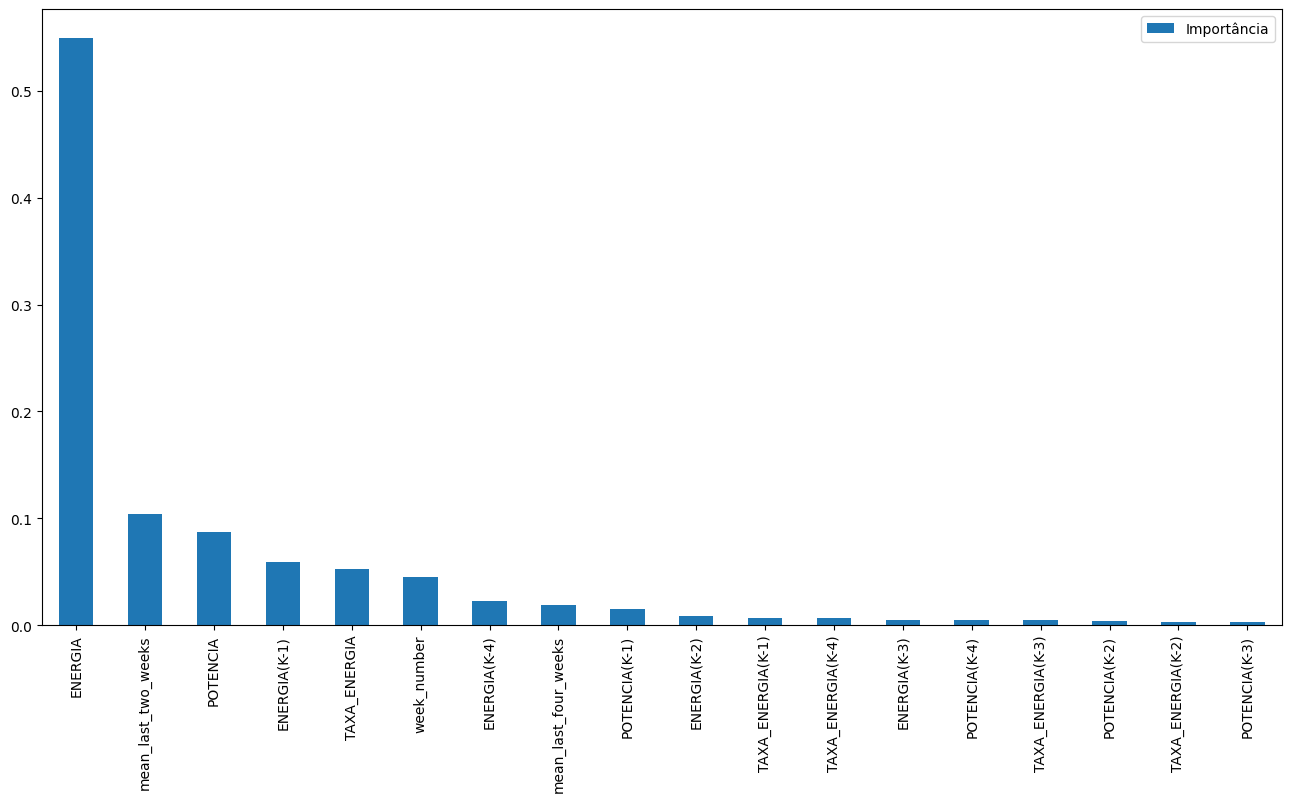

In [36]:
feature_importances.plot(kind='bar', figsize=(16,8))

In [34]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            x=feature_importances.index,
            y=feature_importances['Importância']
        )
    ]
)

fig.update_layout(
    title='Feature Importances',
    xaxis_title='Features',
    yaxis_title='Importance'
)

fig.show()

## Imagens para o relatório

In [34]:
aux = data_semanal[['POTENCIA','TEMPO']].copy()
aux.set_index('TEMPO', inplace=True)

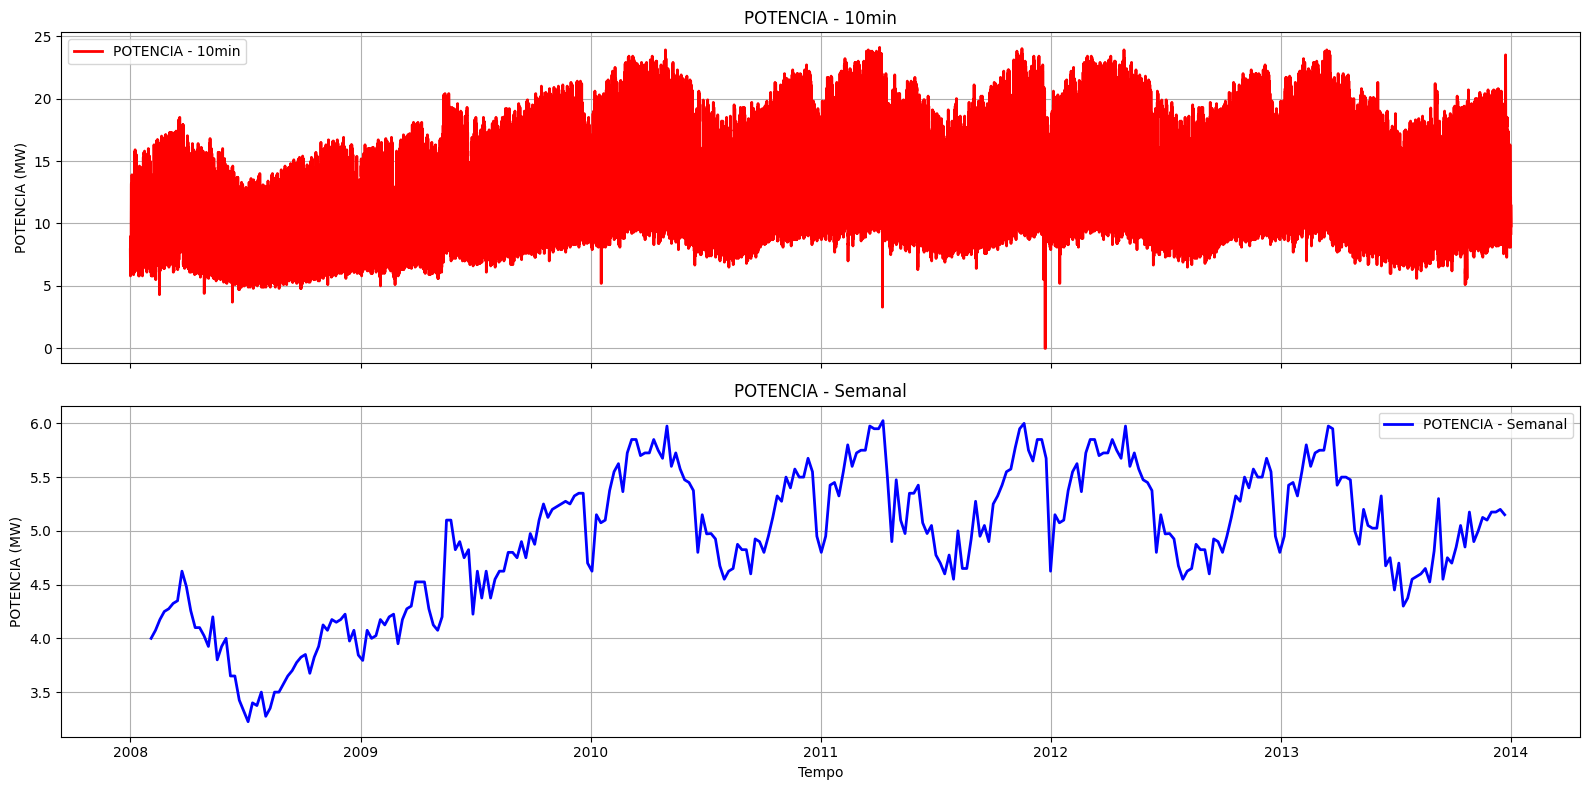

In [45]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

axs[0].plot(data[['POTENCIA']], label='POTENCIA - 10min', color='red', linewidth=2)
axs[1].plot(aux, label='POTENCIA - Semanal', color='blue', linewidth=2)

axs[0].set_ylabel('POTENCIA (MW)')
axs[0].set_title('POTENCIA - 10min')
axs[0].legend()
axs[0].grid()

axs[1].set_xlabel('Tempo')
axs[1].set_ylabel('POTENCIA (MW)')
axs[1].set_title('POTENCIA - Semanal')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.savefig(
    'potencia_10min_semanal.pdf',
    format='pdf',
    dpi=300
)

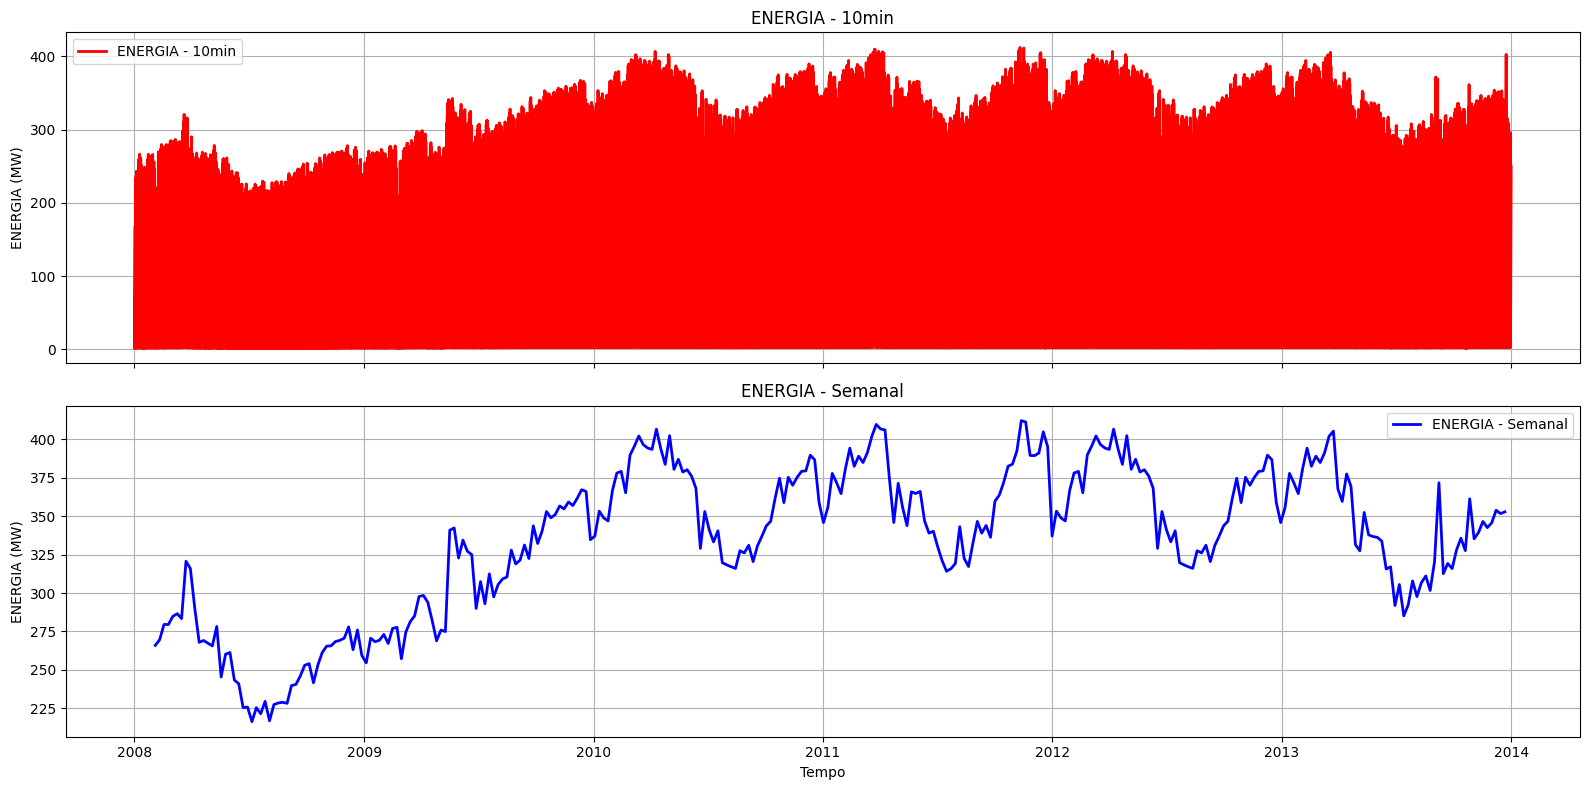

In [46]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

aux = data_semanal[['ENERGIA','TEMPO']].copy()
aux.set_index('TEMPO', inplace=True)

axs[0].plot(data[['ENERGIA']], label='ENERGIA - 10min', color='red', linewidth=2)
axs[1].plot(aux, label='ENERGIA - Semanal', color='blue', linewidth=2)

axs[0].set_ylabel('ENERGIA (MW)')
axs[0].set_title('ENERGIA - 10min')
axs[0].legend()
axs[0].grid()

axs[1].set_xlabel('Tempo')
axs[1].set_ylabel('ENERGIA (MW)')
axs[1].set_title('ENERGIA - Semanal')
axs[1].legend()
axs[1].grid()

plt.tight_layout()

plt.savefig(
    'energia_10min_semanal.pdf',
    format='pdf',
    dpi=300
)

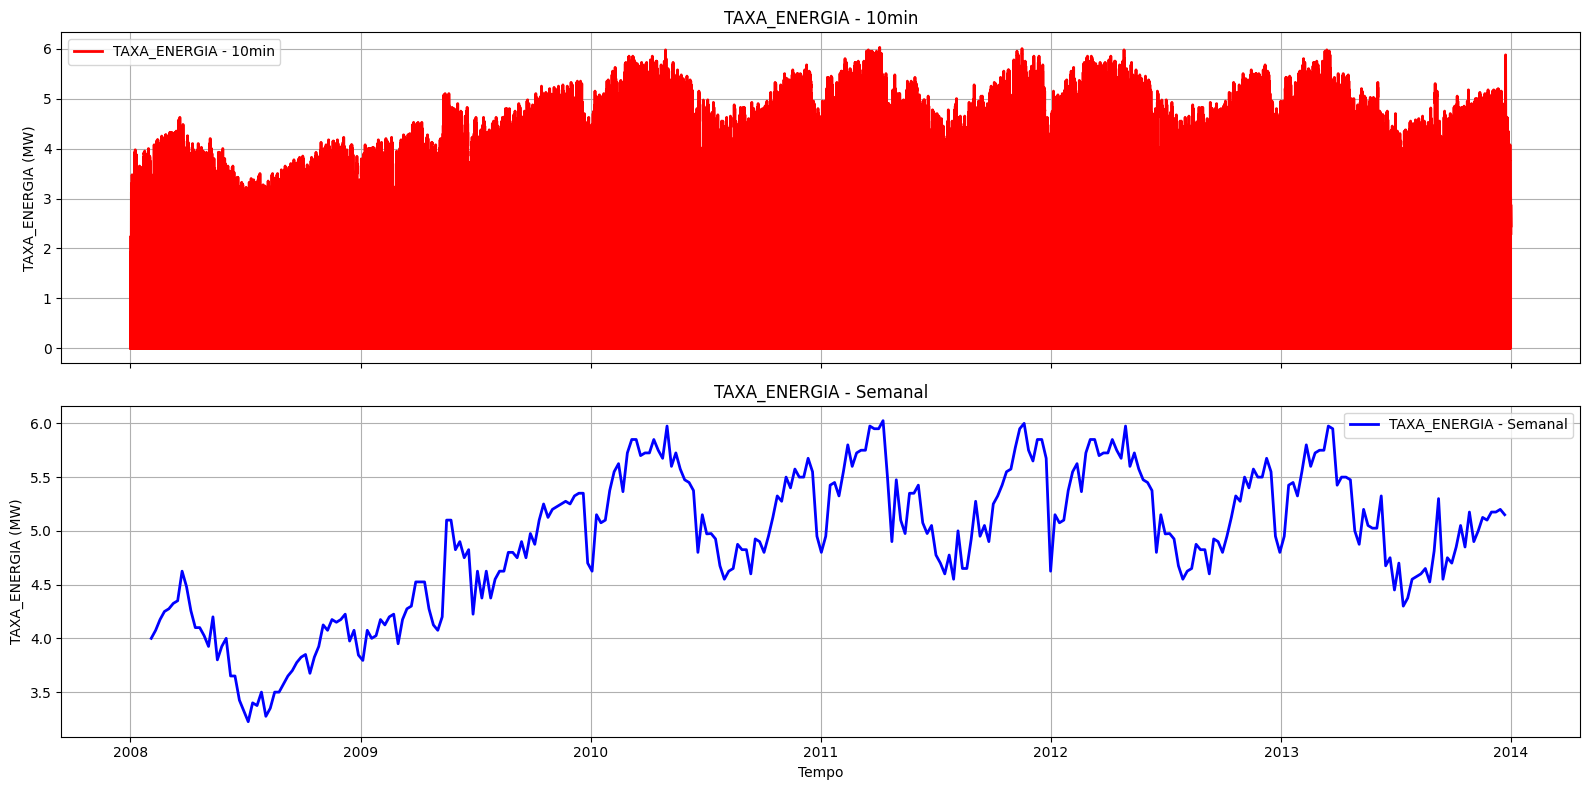

In [47]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

aux = data_semanal[['TAXA_ENERGIA','TEMPO']].copy()
aux.set_index('TEMPO', inplace=True)

axs[0].plot(data[['TAXA_ENERGIA']], label='TAXA_ENERGIA - 10min', color='red', linewidth=2)
axs[1].plot(aux, label='TAXA_ENERGIA - Semanal', color='blue', linewidth=2)

axs[0].set_ylabel('TAXA_ENERGIA (MW)')
axs[0].set_title('TAXA_ENERGIA - 10min')
axs[0].legend()
axs[0].grid()

axs[1].set_xlabel('Tempo')
axs[1].set_ylabel('TAXA_ENERGIA (MW)')
axs[1].set_title('TAXA_ENERGIA - Semanal')
axs[1].legend()
axs[1].grid()

plt.tight_layout()

plt.savefig(
    'taxa_energia_10min_semanal.pdf',
    format='pdf',
    dpi=300
)

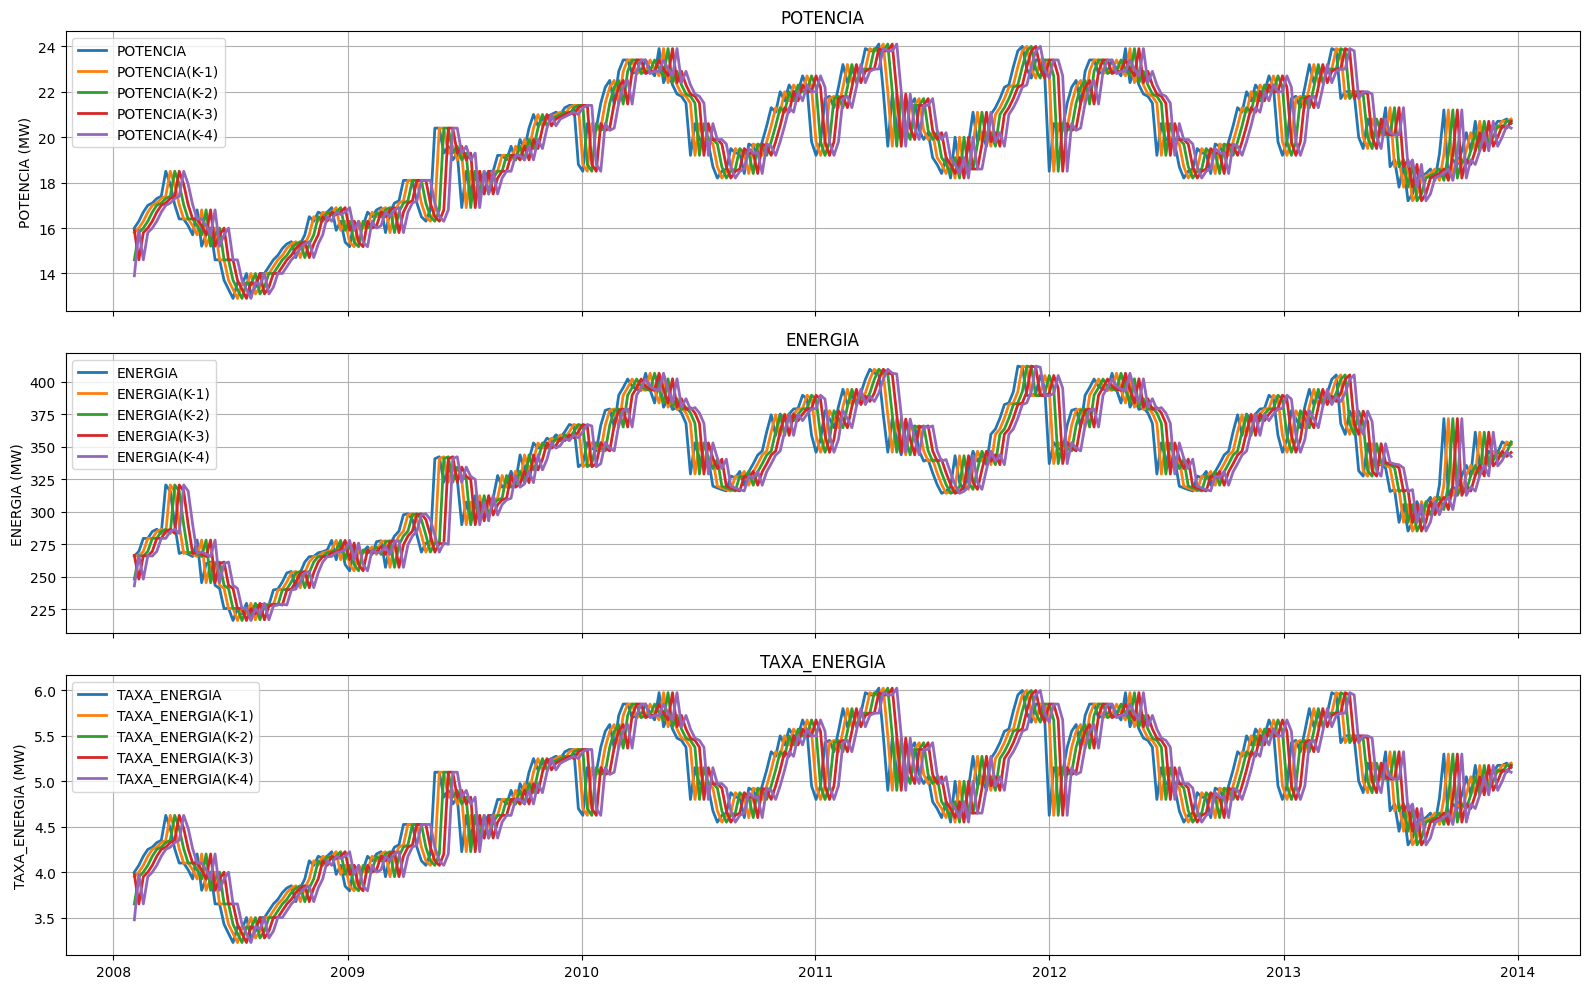

In [54]:
fig, axs = plt.subplots(3,1, sharex=True, figsize=(16,10))

aux = data_semanal[['POTENCIA','TEMPO','POTENCIA(K-1)', 'POTENCIA(K-2)', 'POTENCIA(K-3)', 'POTENCIA(K-4)']].copy()
aux.set_index('TEMPO', inplace=True)

axs[0].plot(aux, linewidth=2)
axs[0].set_ylabel('POTENCIA (MW)')
axs[0].set_title('POTENCIA')
axs[0].legend(['POTENCIA','POTENCIA(K-1)', 'POTENCIA(K-2)', 'POTENCIA(K-3)', 'POTENCIA(K-4)'])
axs[0].grid()

aux = data_semanal[['ENERGIA','TEMPO','ENERGIA(K-1)', 'ENERGIA(K-2)', 'ENERGIA(K-3)', 'ENERGIA(K-4)']].copy()
aux.set_index('TEMPO', inplace=True)

axs[1].plot(aux, linewidth=2)
axs[1].set_ylabel('ENERGIA (MW)')
axs[1].set_title('ENERGIA')
axs[1].legend(['ENERGIA','ENERGIA(K-1)', 'ENERGIA(K-2)', 'ENERGIA(K-3)', 'ENERGIA(K-4)'])
axs[1].grid()

aux = data_semanal[['TAXA_ENERGIA','TEMPO','TAXA_ENERGIA(K-1)', 'TAXA_ENERGIA(K-2)', 'TAXA_ENERGIA(K-3)', 'TAXA_ENERGIA(K-4)']].copy()
aux.set_index('TEMPO', inplace=True)

axs[2].plot(aux, linewidth=2)
axs[2].set_ylabel('TAXA_ENERGIA (MW)')
axs[2].set_title('TAXA_ENERGIA')
axs[2].legend(['TAXA_ENERGIA','TAXA_ENERGIA(K-1)', 'TAXA_ENERGIA(K-2)', 'TAXA_ENERGIA(K-3)', 'TAXA_ENERGIA(K-4)'])
axs[2].grid()

plt.tight_layout()

plt.savefig(
    'banco_de_dados_gerado.pdf',
    format='pdf',
    dpi=300
)

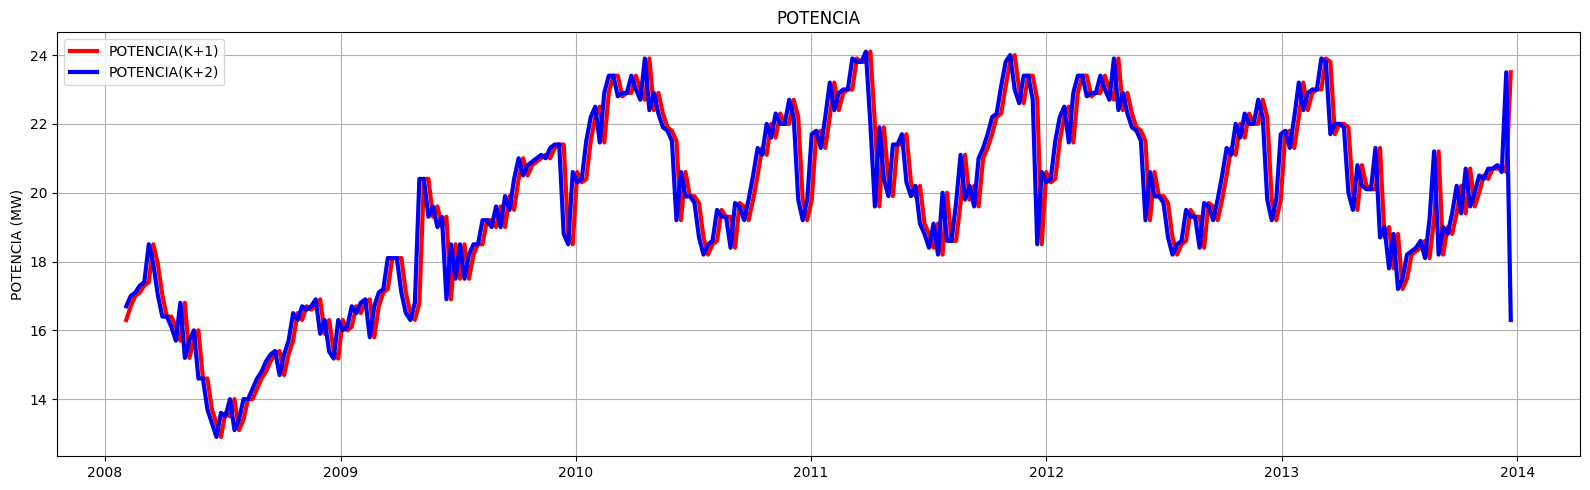

In [61]:
fig, axs = plt.subplots(1,1, sharex=True, figsize=(16,5))

aux = data_semanal[['TEMPO','POTENCIA(K+1)', 'POTENCIA(K+2)']].copy()
aux.set_index('TEMPO', inplace=True)

axs.plot(aux[['POTENCIA(K+1)']], color='red', linewidth=3)
axs.plot(aux[['POTENCIA(K+2)']], color='blue', linewidth=3)
axs.set_ylabel('POTENCIA (MW)')
axs.set_title('POTENCIA')
axs.legend(['POTENCIA(K+1)', 'POTENCIA(K+2)'])
axs.grid()

plt.tight_layout()

plt.savefig(
    'banco_de_dados_gerado_saidas.pdf',
    format='pdf',
    dpi=300
)